In [360]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get current working directory
print(os.getcwd())

file_path = '../eda/preprocessed_matches.csv'
data = pd.read_csv(file_path)

columns_to_remove = ['Unnamed: 0','scoreLink-href','HTeam','ATeam','Date','Season', 'Time', 'Away']
data = data.drop(columns=columns_to_remove)

data.head()
print(data.columns)


c:\Users\vionh\workspace\KIAProject\model
Index(['home_substitutions', 'away_substitutions', 'home_possession',
       'away_possession', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots_off_target', 'away_shots_off_target',
       'home_shots_outside_box', 'away_shots_outside_box',
       'home_shots_per_goal', 'away_shots_per_goal', 'home_shots_blocked',
       'away_shots_blocked', 'home_attempts_on_goal', 'away_attempts_on_goal',
       'home_saves', 'away_saves', 'home_corners', 'away_corners',
       'home_fouls', 'away_fouls', 'home_offsides', 'away_offsides',
       'home_total_passes', 'away_total_passes', 'home_accurate_passes',
       'away_accurate_passes', 'home_pass_accuracy(%)',
       'away_pass_accuracy(%)', 'HG', 'AG', 'Res', 'avg_betting_odds_home',
       'avg_betting_odds_draw', 'avg_betting_odds_away'],
      dtype='object')


In [361]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Selecting relevant features for prediction
features = [
   'home_possession', 'away_possession', 'home_shots_on_target', 'away_shots_on_target',
       'home_saves', 'away_saves', 'avg_betting_odds_home',
       'avg_betting_odds_draw', 'avg_betting_odds_away'
]

X = data[features]
y = data['Res']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Building a Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Making predictions
y_pred = model_rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print("Random Forest:")
print(report)

Accuracy: 0.7549668874172185
Random Forest:
              precision    recall  f1-score   support

           A       0.85      0.74      0.79        38
           D       0.53      0.53      0.53        36
           H       0.82      0.87      0.84        77

    accuracy                           0.75       151
   macro avg       0.73      0.71      0.72       151
weighted avg       0.76      0.75      0.75       151



### Random Forest Classifier

In [362]:
# Building a Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Making predictions
y_pred = model_rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print("Random Forest:")
print(report)

Accuracy: 0.7549668874172185
Random Forest:
              precision    recall  f1-score   support

           A       0.85      0.74      0.79        38
           D       0.53      0.53      0.53        36
           H       0.82      0.87      0.84        77

    accuracy                           0.75       151
   macro avg       0.73      0.71      0.72       151
weighted avg       0.76      0.75      0.75       151



### Decision Tree Classifier

In [363]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Making predictions
y_pred = model_dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7549668874172185
Classification Report:
              precision    recall  f1-score   support

           A       0.73      0.63      0.68        38
           D       0.53      0.67      0.59        36
           H       0.90      0.86      0.88        77

    accuracy                           0.75       151
   macro avg       0.72      0.72      0.72       151
weighted avg       0.77      0.75      0.76       151



Both models have a solid accuracy. Lets proceed with our analysis...

In [364]:
rf_cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
dt_cv_scores = cross_val_score(model_dt, X_train, y_train, cv=5)

print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Random Forest Average CV Score:", rf_cv_scores.mean())
print("Decision Tree Average CV Score:", dt_cv_scores.mean())
print(f"Standard Deviation of CV Score: {rf_cv_scores.std():.2f}")
print(f"Standard Deviation of CV Score: {dt_cv_scores.std():.2f}")


Random Forest Cross-Validation Scores: [0.7107438  0.71666667 0.71666667 0.70833333 0.75833333]
Decision Tree Cross-Validation Scores: [0.71900826 0.775      0.675      0.75       0.73333333]
Random Forest Average CV Score: 0.7221487603305785
Decision Tree Average CV Score: 0.7304683195592286
Standard Deviation of CV Score: 0.02
Standard Deviation of CV Score: 0.03


In [365]:
train_accuracy = model_rf.score(X_train, y_train)
test_accuracy = model_rf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

train_accuracy = model_dt.score(X_train, y_train)
test_accuracy = model_dt.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.75
Training Accuracy: 1.00
Test Accuracy: 0.75


A training accuracy of 1.0 for both models raises some concerns as this indicates it is overfitting and cannot respond well to unseen data. Also the drop to the test accuracy score makes it even more unrealistic.

In [366]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters for Random Forest:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [367]:
# Predict with the best model
best_rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
best_rf_report = classification_report(y_test, best_rf_y_pred, target_names=label_encoder.classes_)

print("Fine-Tuned Random Forest Accuracy:", best_rf_accuracy)
print("Fine-Tuned Random Forest Classification Report:\n", best_rf_report)

# Error analysis
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)


Fine-Tuned Random Forest Accuracy: 0.7549668874172185
Fine-Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           A       0.87      0.71      0.78        38
           D       0.53      0.50      0.51        36
           H       0.80      0.90      0.85        77

    accuracy                           0.75       151
   macro avg       0.73      0.70      0.71       151
weighted avg       0.75      0.75      0.75       151

Feature Importances:
                  Feature  Importance
2   home_shots_on_target    0.294332
3   away_shots_on_target    0.274628
6  avg_betting_odds_home    0.078583
8  avg_betting_odds_away    0.077150
7  avg_betting_odds_draw    0.074103
0        home_possession    0.064091
1        away_possession    0.059319
5             away_saves    0.041536
4             home_saves    0.036260


In [368]:
train_accuracy = best_rf_model.score(X_train, y_train)
test_accuracy = best_rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.96
Test Accuracy: 0.75


Feature Importances:
                  Feature  Importance
2   home_shots_on_target    0.294332
3   away_shots_on_target    0.274628
6  avg_betting_odds_home    0.078583
8  avg_betting_odds_away    0.077150
7  avg_betting_odds_draw    0.074103
0        home_possession    0.064091
1        away_possession    0.059319
5             away_saves    0.041536
4             home_saves    0.036260


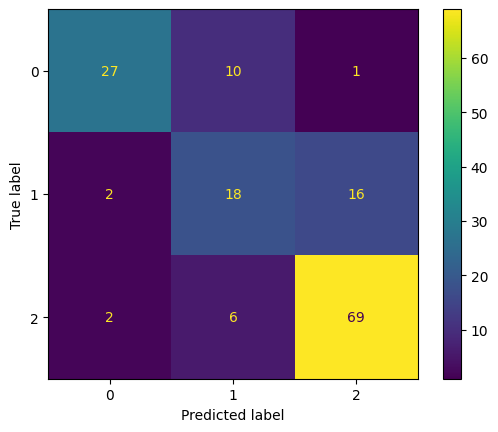

In [369]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with the best model
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot()

# Error analysis with feature importances
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

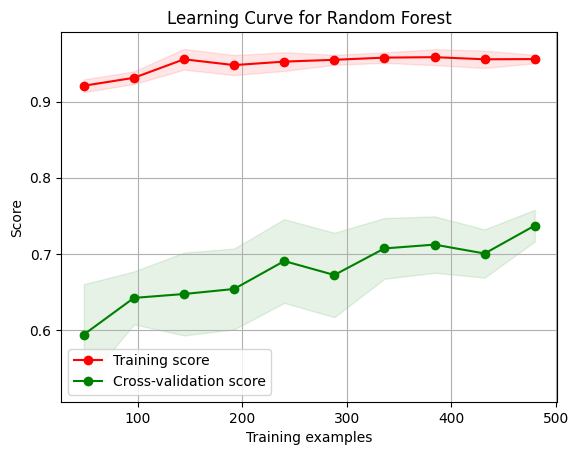

In [370]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curves"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for the best model
plot_learning_curve(best_rf_model, X_train, y_train, title="Learning Curve for Random Forest")
plt.show()

Few features have been removed and some were added. The test accuracy after fine tuning has been increased however the training accuracy is just unrealistic at this point. Thus, we should think about looking for another model. But before we do that we will perform some other techniques.

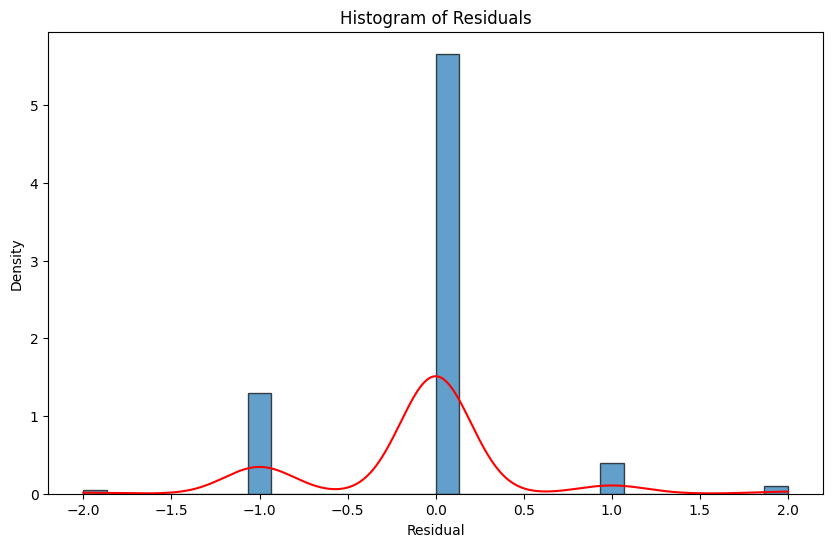

In [371]:
import matplotlib.pyplot as plt

# Calculate residuals for the best model
best_model = best_rf_model  # Assuming best_rf_model is the trained model
residuals = y_test - best_model.predict(X_test)

# Plot the histogram of residuals with a density plot
plt.figure(figsize=(10, 6))
plt.hist(residuals.flatten(), bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Density')

# Add a KDE plot for better visualization
from scipy.stats import gaussian_kde
kde = gaussian_kde(residuals.flatten())
x_vals = np.linspace(min(residuals.flatten()), max(residuals.flatten()), 1000)
plt.plot(x_vals, kde(x_vals), color='red')

plt.show()

Also the residuals do not seem to be that off from the true value which is also quite strange. Meaning that the model memorizes the train set and is not that much off of the true results.

In [372]:
# Select the top N most important features
N = 10 
top_features = feature_importance_df['Feature'].head(N).tolist()

# Select only the most important features from the dataset
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [373]:
# Retrain the Random Forest model with the selected features
best_rf_model.fit(X_train_top, y_train)

# Evaluate the retrained model
train_accuracy_top = best_rf_model.score(X_train_top, y_train)
test_accuracy_top = best_rf_model.score(X_test_top, y_test)

print(f"Training Accuracy with top features: {train_accuracy_top:.2f}")
print(f"Test Accuracy with top features: {test_accuracy_top:.2f}")

y_pred_top = best_rf_model.predict(X_test_top)
report_top = classification_report(y_test, y_pred_top, target_names=label_encoder.classes_)
print(f"Classification Report with top features:\n{report_top}")


Training Accuracy with top features: 0.95
Test Accuracy with top features: 0.75
Classification Report with top features:
              precision    recall  f1-score   support

           A       0.87      0.68      0.76        38
           D       0.55      0.50      0.52        36
           H       0.80      0.91      0.85        77

    accuracy                           0.75       151
   macro avg       0.74      0.70      0.71       151
weighted avg       0.75      0.75      0.75       151



In [374]:
# Compare the model's performance before and after feature selection
print(f"Original Test Accuracy: {test_accuracy:.2f}")
print(f"Test Accuracy with top features: {test_accuracy_top:.2f}")


Original Test Accuracy: 0.75
Test Accuracy with top features: 0.75


Also even selecting the top 10 most impactful features is not changing the training accuracy so we will select a different model. Nonetheless the test accuracy has been improved.

### Logistic Regression

In [375]:
from sklearn.linear_model import LogisticRegression

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform cross-validation
model_lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.5)
model_lr.fit(X_train_scaled, y_train)
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.78512397 0.81666667 0.71666667 0.775      0.825     ]
Mean Cross-Validation Score: 0.7836914600550964


Index(['away_shots_on_target', 'home_saves', 'home_shots_on_target',
       'away_saves', 'avg_betting_odds_home', 'away_possession',
       'home_possession', 'avg_betting_odds_draw', 'avg_betting_odds_away'],
      dtype='object')
[3.51954614 2.24071727 2.22193538 1.13031985 0.19599206 0.16327138
 0.16327138 0.09499844 0.01539899]


<Figure size 1000x600 with 0 Axes>

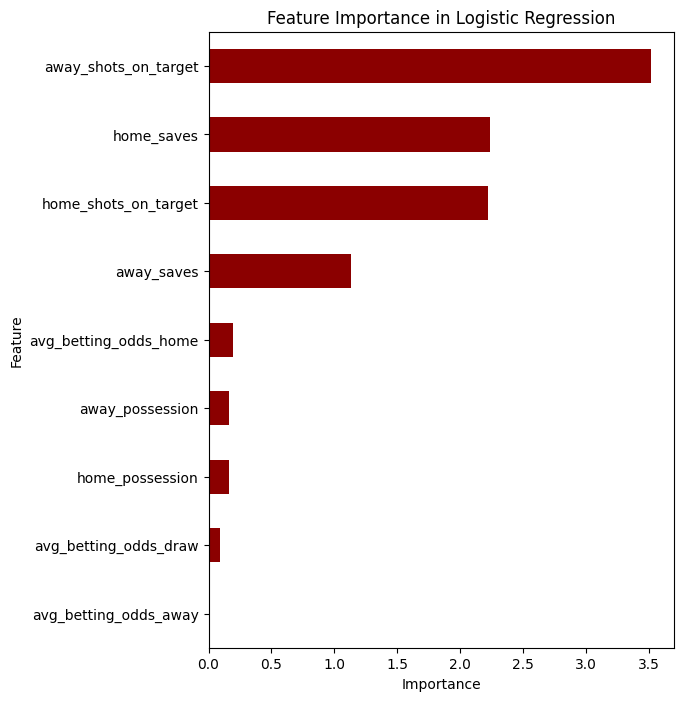

In [376]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Initialize and fit the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=0.5)
model_lr.fit(X_train_scaled_df, y_train)

# Get the feature names
feature_names = X_train_scaled_df.columns

# Get the coefficients and their absolute values
importances = np.abs(model_lr.coef_[0])

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print feature names and importance values
print(feature_names[indices])
print(importances[indices])

# Create a DataFrame for the feature importances
df_fi = pd.DataFrame({'features': feature_names[indices], 'importances': importances[indices]})

# Plot the feature importances
plt.figure(figsize=(10, 6))
df_fi.plot(kind='barh', y='importances', x='features', color='darkred', figsize=(6, 8), legend=False)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

This model seems to perform better already and is more realistic as the accuracy for both, training and test, is almost the same.

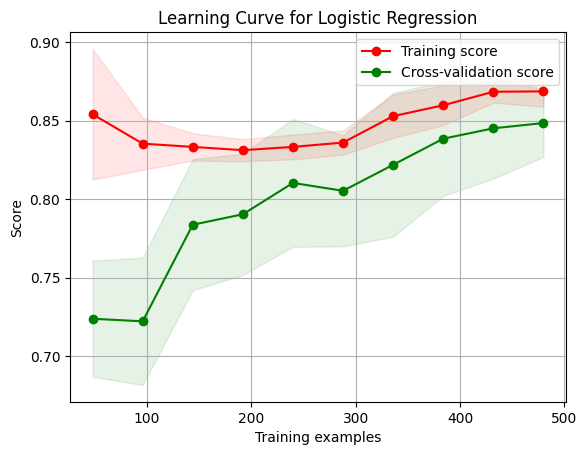

In [377]:
plot_learning_curve(model_lr, X_train, y_train, title="Learning Curve for Logistic Regression")
plt.show()

Training score shows a slight decreasing trend but remains relatively high, indicating that the model was overfitting initially and still overfits to some extent.

Larger gap initially, which reduces but remains wider than the fine-tuned model, indicating persistent overfitting.

Lets try to remove the unnecessary features

Following features were removed as these were the last 10-15 ranked features which did not have an impact:

'away_substitutions','home_shots_outside_box', 'away_shots_outside_box','home_shots_blocked','home_fouls', 'away_fouls', 'home_offsides', 'away_offsides',
       'home_total_passes', 'away_total_passes', 'home_accurate_passes',
       'away_accurate_passes', 'home_pass_accuracy(%)','away_pass_accuracy(%)', 'home_shots_blocked'

### Fine Tuning and error analysis

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'solver': 'saga'}
Training Accuracy: 0.8851913477537438
Test Accuracy: 0.9337748344370861
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.95      0.97        38
           D       0.86      0.86      0.86        36
           H       0.94      0.96      0.95        77

    accuracy                           0.93       151
   macro avg       0.93      0.92      0.93       151
weighted avg       0.93      0.93      0.93       151



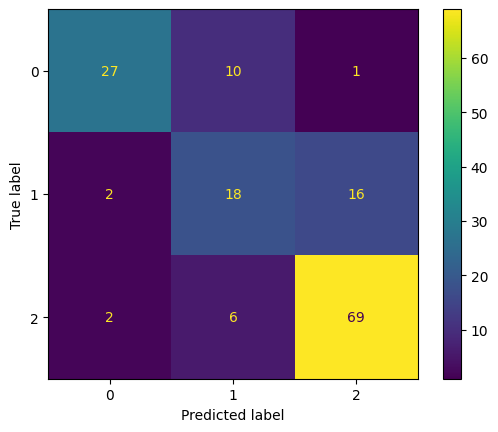

In [378]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10],
    'solver': ['liblinear', 'saga', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model with best parameters
best_model_lr = grid_search.best_estimator_
best_model_lr.fit(X_train_scaled, y_train)

# Making predictions on training and test sets
y_train_pred = best_model_lr.predict(X_train_scaled)
y_test_pred = best_model_lr.predict(X_test_scaled)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:")
print(report)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_lr.classes_)
disp.plot()

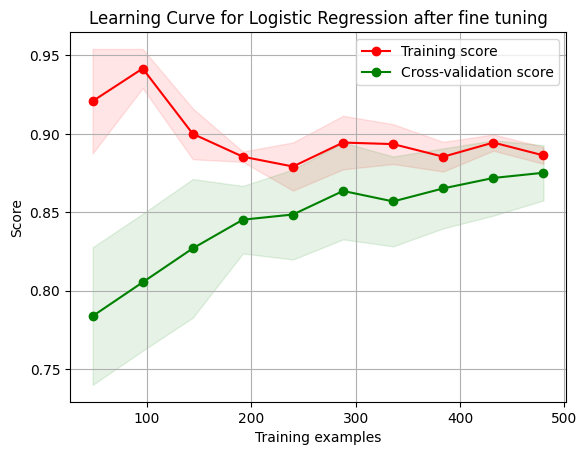

In [379]:
plot_learning_curve(best_model_lr, X_train_scaled, y_train, title="Learning Curve for Logistic Regression after fine tuning")
plt.show()

This image shows a better learning curve for Logistic Regression with improved generalization and higher cross-validation scores compared to the one before fine-tuning. Fine-tuning has positively impacted the model’s performance by reducing overfitting and increasing the cross-validation score.

In [381]:
cv_scores = cross_val_score(best_model_lr, X_train_scaled, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.89256198 0.875      0.84166667 0.88333333 0.88333333]
Mean Cross-Validation Score: 0.8751790633608817


In [380]:
import pickle

# save model to file
model_filename = "swiss_super_league.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(best_model_lr, file=f)

### Results of user validation

Omar Mohamed Zahir: 
Lisi Useini:
Benjamin Stucki: Simple UI